Dataset Overview
Train shape: (1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCon

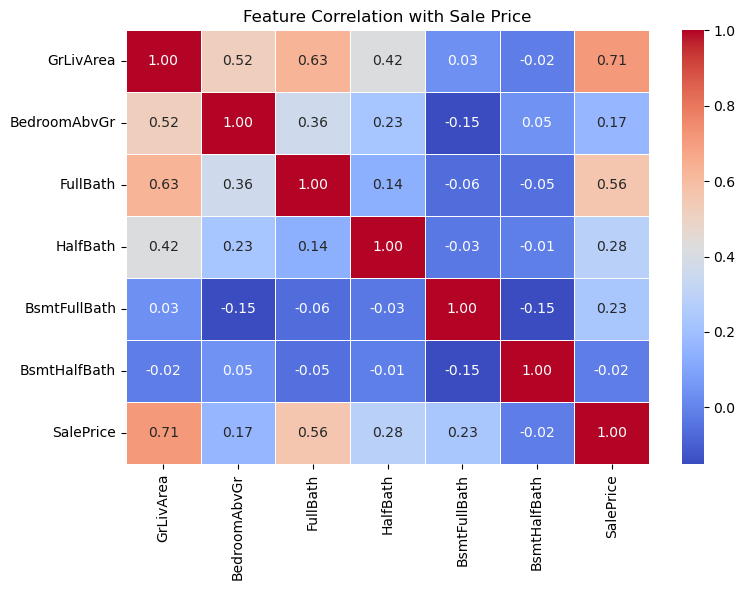

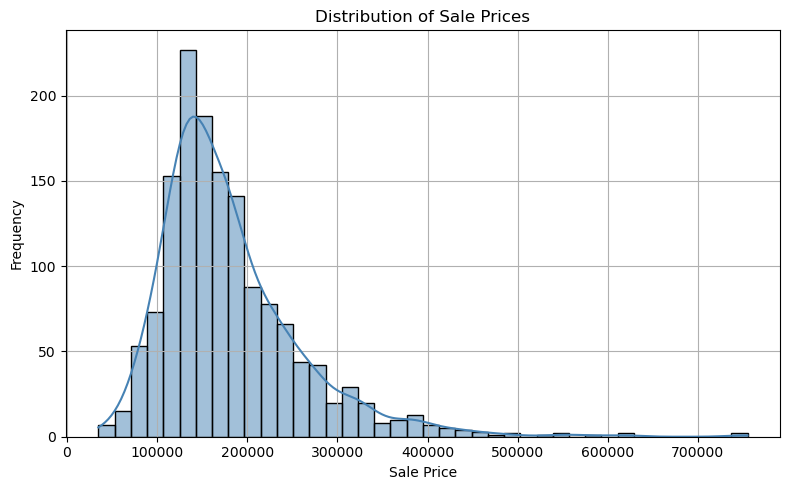

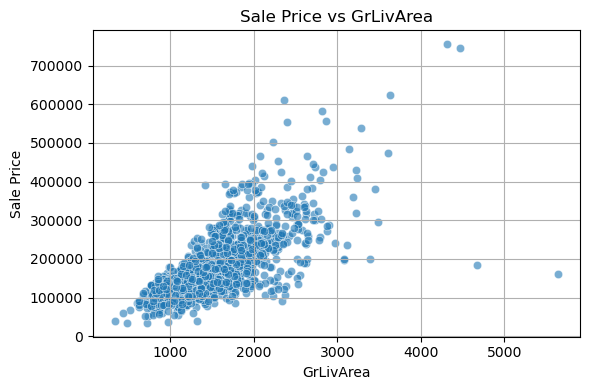

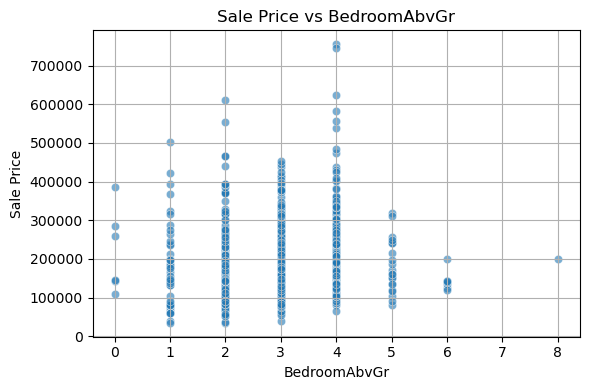

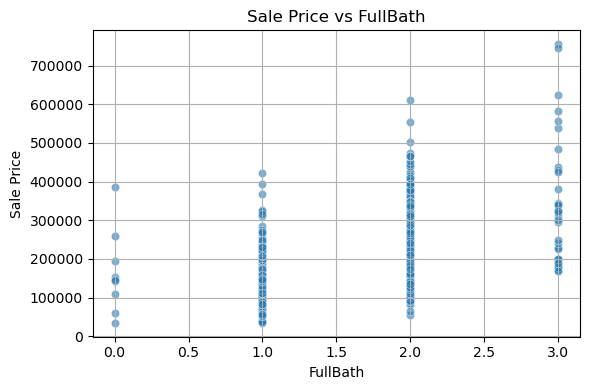

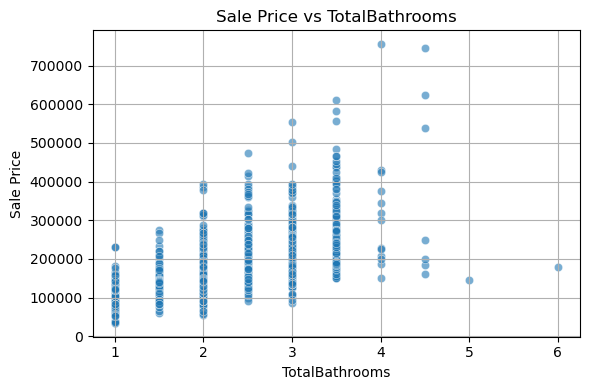


Model Performance on Training Data
 - Mean Absolute Error (MAE):     33626.55
 - Root Mean Squared Error (RMSE): 49352.23
 - R² Score:                        0.6138


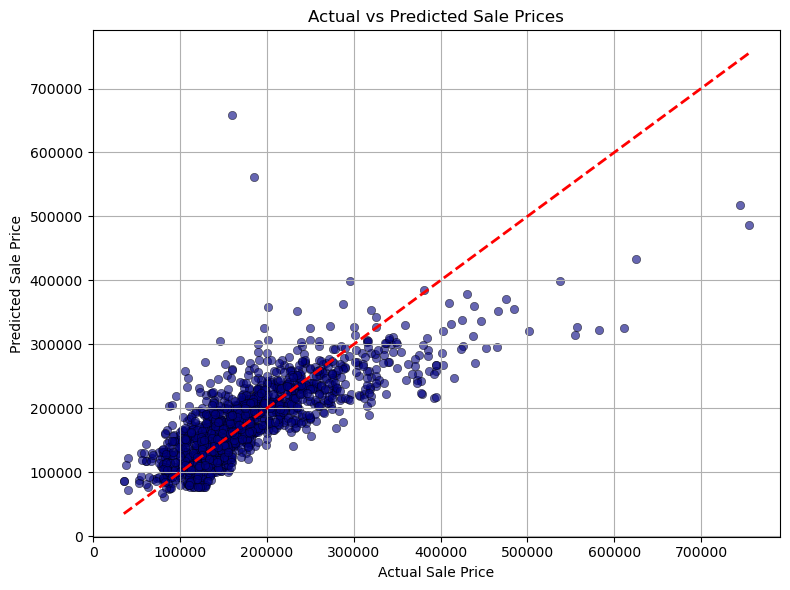

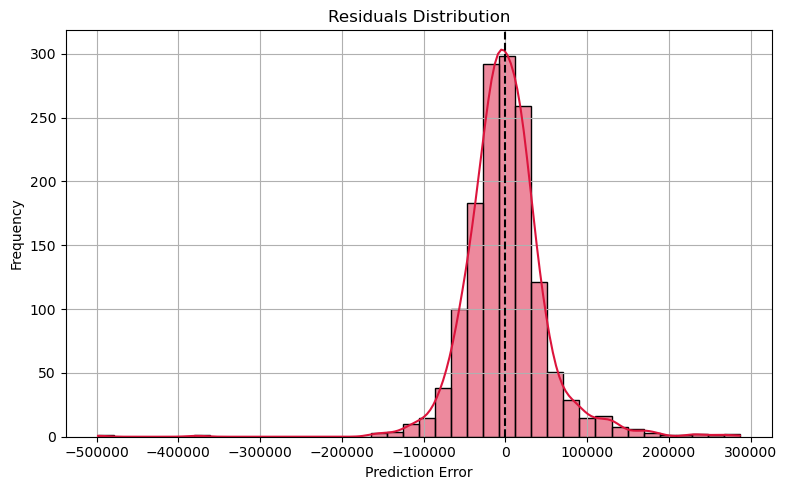

In [1]:
"""
🏠 House Price Prediction using Linear Regression

This project trains a simple linear regression model to predict house prices 
using key features from the Ames Housing dataset.

Author: Dipti Sinha
Date: June 29, 2025
"""

# =======================
# Import Required Libraries
# =======================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# =======================
# Load the Dataset
# =======================
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# =======================
# Exploratory Data Analysis (EDA)
# =======================

print("Dataset Overview")
print("Train shape:", train_df.shape)
print(train_df.head())

print("\nMissing Values (Top 10)")
print(train_df.isnull().sum().sort_values(ascending=False).head(10))

print("\nSummary Statistics")
print(train_df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 'SalePrice']].describe())

# Correlation heatmap
plt.figure(figsize=(8, 6))
corr_matrix = train_df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 
                        'BsmtFullBath', 'BsmtHalfBath', 'SalePrice']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation with Sale Price")
plt.tight_layout()
plt.show()

# Sale Price distribution
plt.figure(figsize=(8, 5))
sns.histplot(train_df['SalePrice'], bins=40, kde=True, color='steelblue')
plt.title("Distribution of Sale Prices")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# =======================
# Feature Engineering
# =======================
# Create a new feature for total number of bathrooms
for df in [train_df, test_df]:
    df['TotalBathrooms'] = (
        df['FullBath'].fillna(0) +
        0.5 * df['HalfBath'].fillna(0) +
        df['BsmtFullBath'].fillna(0) +
        0.5 * df['BsmtHalfBath'].fillna(0)
    )

# Visualize relationships with target
for feature in ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'TotalBathrooms']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=train_df[feature], y=train_df['SalePrice'], alpha=0.6)
    plt.title(f"Sale Price vs {feature}")
    plt.xlabel(feature)
    plt.ylabel("Sale Price")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# =======================
# Model Training
# =======================

# Select features for training
features = ['GrLivArea', 'BedroomAbvGr', 'TotalBathrooms']
X_train = train_df[features].fillna(train_df[features].median())
y_train = train_df['SalePrice']
X_test = test_df[features].fillna(train_df[features].median())

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on training data
train_preds = model.predict(X_train)

# Evaluate performance
mae = mean_absolute_error(y_train, train_preds)
rmse = np.sqrt(mean_squared_error(y_train, train_preds))
r2 = r2_score(y_train, train_preds)

print("\nModel Performance on Training Data")
print(f" - Mean Absolute Error (MAE):     {mae:.2f}")
print(f" - Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f" - R² Score:                        {r2:.4f}")

# =======================
# Visualizations
# =======================

# Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=train_preds, color='navy', alpha=0.6, edgecolor='k')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', linewidth=2)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted Sale Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

# Residuals Distribution
residuals = y_train - train_preds
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=40, color='crimson')
plt.axvline(0, linestyle='--', color='black')
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()
